<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week8_Reviews_NB_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.9 MB/s eta 0:00:00
🔧 Initializing components...
✅ SpaCy, Faker, and stemmer ready.
📦 Generating 10,000 noisy comments...
✅ Dataset created.
🔠 Vectorizing text using CountVectorizer + custom tokenizer...


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


✅ Vectorization complete. Feature matrix shape: (10000, 756)
📚 Splitting data: 80% train, 20% test...
✅ Split complete.
🧠 Training Naive Bayes model...
✅ Model trained.
🔁 Running cross-validation...

📈 Cross-Validation Scores: [0.963125 0.9725   0.968125 0.978125 0.965625]
📊 Mean CV Accuracy: 0.9695

🔍 Predicting test set...
✅ Prediction complete.

🧾 Evaluation on Test Set:
Precision: 0.9771
Recall: 0.9765
F1 Score: 0.9765
Accuracy: 0.9765

📊 Confusion Matrix:


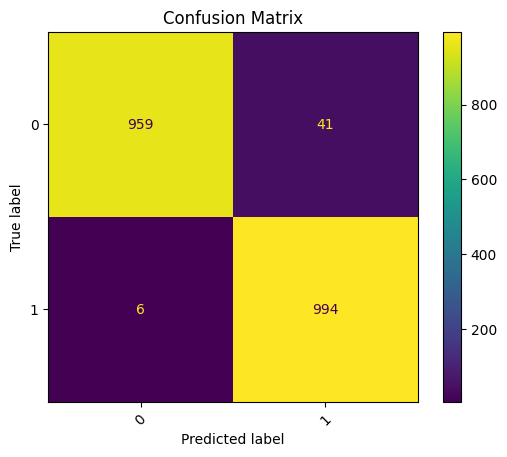


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1000
           1       0.96      0.99      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000


🔎 Top predictive words per class:

Top words for class '0':
  experi          -> log-prob: -3.5781
  qualiti         -> log-prob: -3.5824
  servic          -> log-prob: -3.5853
  buy             -> log-prob: -3.6014
  complet         -> log-prob: -3.6044
  wast            -> log-prob: -3.6044
  aw              -> log-prob: -3.6103
  worth           -> log-prob: -3.6118
  terribl         -> log-prob: -3.6178
  horribl         -> log-prob: -3.6238

Top words for class '1':
  like            -> log-prob: -3.5308
  work            -> log-prob: -3.5733
  product         -> log-prob: -3.5953
  charm           -> log-prob: -3.6121
  fantast     

In [2]:
!pip install faker

import pandas as pd
import numpy as np
import random
from faker import Faker
import spacy
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt

# Setup
print("🔧 Initializing components...")
fake = Faker()
nlp = spacy.load("en_core_web_sm")
stemmer = PorterStemmer()
random.seed(42)
print("✅ SpaCy, Faker, and stemmer ready.")

# Generate synthetic dataset
def generate_review(label):
    pos = ["Absolutely love", "Totally worth it", "Highly recommend", "Fantastic product", "Great", "Works like a charm"]
    neg = ["Complete waste", "Terrible quality", "Would not buy again", "Awful experience", "Not worth it", "Horrible service"]
    emojis = ["😍", "😡", "👍", "👎", "💯", "😤", "🔥", "💩"]
    noise = fake.sentence()
    if label == 1:
        return f"{random.choice(pos)}! {random.choice(emojis)} {noise}"
    else:
        return f"{random.choice(neg)}! {random.choice(emojis)} {noise}"

print("📦 Generating 10,000 noisy comments...")
comments = [generate_review(1) for _ in range(5000)] + [generate_review(0) for _ in range(5000)]
labels = ["Positive"] * 5000 + ["Negative"] * 5000
df = pd.DataFrame({"Comment": comments, "Topic": labels})
print("✅ Dataset created.")

# Tokenizer
def spacy_tokenizer(sentence):
    doc = nlp(str(sentence))
    return [stemmer.stem(token.lemma_.lower().strip()) for token in doc if not token.is_stop and token.is_alpha]

# Vectorize
print("🔠 Vectorizing text using CountVectorizer + custom tokenizer...")
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,1))
X = vectorizer.fit_transform(df['Comment'])
y = df['Topic'].astype('category').cat.codes
print(f"✅ Vectorization complete. Feature matrix shape: {X.shape}")

# Train-test split
print("📚 Splitting data: 80% train, 20% test...")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("✅ Split complete.")

# Train model
print("🧠 Training Naive Bayes model...")
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("✅ Model trained.")

# Cross-validation
print("🔁 Running cross-validation...")
cv_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy')
print("\n📈 Cross-Validation Scores:", cv_scores)
print("📊 Mean CV Accuracy:", round(np.mean(cv_scores), 4))

# Predict
print("\n🔍 Predicting test set...")
preds = clf.predict(X_test)
print("✅ Prediction complete.")

# Evaluate
print("\n🧾 Evaluation on Test Set:")
print("Precision:", round(precision_score(y_test, preds, average='weighted'), 4))
print("Recall:", round(recall_score(y_test, preds, average='weighted'), 4))
print("F1 Score:", round(f1_score(y_test, preds, average='weighted'), 4))
print("Accuracy:", round(accuracy_score(y_test, preds), 4))

# Confusion matrix
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Classification report
print("\n📋 Classification Report:")
target_names = [str(cls) for cls in clf.classes_]
print(classification_report(y_test, preds, target_names=target_names))

# Top predictive words per class
print("\n🔎 Top predictive words per class:")
feature_names = vectorizer.get_feature_names_out()
for i, class_label in enumerate(clf.classes_):
    top10 = np.argsort(clf.feature_log_prob_[i])[-10:]
    print(f"\nTop words for class '{class_label}':")
    for j in top10[::-1]:
        print(f"  {feature_names[j]:<15} -> log-prob: {clf.feature_log_prob_[i][j]:.4f}")
